In [2]:
!pip install mp_api==0.41.2
!pip install flatten_json==0.1.14
!pip install phonopy
!pip install mp_api

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 4.8 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.1/120.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.0/409.0 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.2 MB/s eta 0:

In [3]:
from mp_api.client import MPRester
import pandas as pd
from flatten_json import flatten

### Wstępny wybór pól i zwiazkow
#### usuniete wiele z nullowych/nanowych sposrod proponowanych

In [4]:
### Tu bedzie proba wycinki
"""
Categorical variables:
    Collocation, Molecules in material ('elements'?), związki 2-3 atomowe raczej chcemy robic, 
 'spacegroup', 'formation_energy', 'magnetic_order' (divide to magnetic and non-magnetic), 
 atom-atom distance, energies, magnetic properties, temperature conducting, 
 fermi energy, bandstructure

z tego w dostepnych polach nie widze:
atom-atom distance temp conducting


"""
# fields_to_fetch2 = [
#     "material_id", "band_gap",  'formula_pretty',  "nelements", "efermi", 
#     "elements", "spacegroup_number", "spacegroup_symbol", 
#     'uncorrected_energy_per_atom','energy_per_atom', 'formation_energy_per_atom',
#     'energy_above_hull', 'equilibrium_reaction_energy_per_atom',
#     'is_magnetic','ordering',  'total_magnetization','total_magnetization_normalized_vol',
# 'total_magnetization_normalized_formula_units',
#     "formation_energy","formation_energy_per_atom", "magnetic_order"
# ]

fields_to_fetch2 = [
    "material_id", "band_gap",  'formula_pretty',  "nelements", "efermi",
    
    "elements", "spacegroup_number", "spacegroup_symbol", 
    'uncorrected_energy_per_atom','energy_per_atom', 'formation_energy_per_atom',
    'energy_above_hull', 'equilibrium_reaction_energy_per_atom',
    'is_magnetic','ordering',  'total_magnetization',

    "formation_energy","formation_energy_per_atom", "magnetic_order"
]


with MPRester("XXX", use_document_model=False) as mpr:
    elements_filtered = mpr.materials.summary.search( fields=fields_to_fetch2, num_elements=(0,3))

Retrieving SummaryDoc documents:   0%|          | 0/86613 [00:00<?, ?it/s]

In [5]:
import pandas as pd
df = pd.DataFrame(elements_filtered)
df

,elements,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,equilibrium_reaction_energy_per_atom,band_gap,efermi,is_magnetic,ordering,total_magnetization
0,[Ac],1,Ac,mp-10018,-68.615840,-68.615840,0.021639,0.021639,NaN,0.0,6.200711,False,NM,0.000059
1,[Ac],1,Ac,mp-1183057,-4.105589,-68.621894,0.015586,0.015586,NaN,0.0,6.155243,False,NM,0.022801
2,[Ac],1,Ac,mp-1183069,-68.625658,-68.625658,0.011822,0.011822,NaN,0.0,6.286559,False,NM,0.000972
3,[Ac],1,Ac,mp-862690,-68.637479,-68.637479,0.000000,0.000000,0.000000,0.0,6.128110,False,NM,0.000107
4,"[Ac, Ag, Ir]",3,Ac2AgIr,mp-861724,-53.160833,-53.160833,-0.413285,0.000000,-0.277707,0.0,6.546351,False,NM,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86608,"[Co, Si, Zr]",3,ZrCoSi,mp-1102565,-15.744957,-7.861548,-0.826070,0.000000,-0.058894,0.0,6.495916,True,FM,3.248911
86609,"[Co, Si, Zr]",3,ZrCoSi,mp-1215304,-7.631870,-7.608203,-0.572725,0.253345,NaN,0.0,7.250945,False,NM,0.006680
86610,"[Co, Sn, Zr]",3,ZrCoSn,mp-30563,-20.679260,-7.030170,-0.466607,0.000000,-0.028101,0.0,7.481996,True,FiM,1.065065
86611,"[Cr, Zr]",2,ZrCr2,mp-1919,-17.443717,-17.443717,0.188442,0.188442,NaN,0.0,5.482434,False,NM,0.000034


#### Podstawowe informacje o sciagnietych danych

In [6]:
print(df.dtypes)
print(df.info())
print(df.isna().sum())
print(df.describe())

elements                                 object
nelements                                 int64
formula_pretty                           object
material_id                              object
uncorrected_energy_per_atom             float64
energy_per_atom                         float64
formation_energy_per_atom               float64
energy_above_hull                       float64
equilibrium_reaction_energy_per_atom    float64
band_gap                                float64
efermi                                  float64
is_magnetic                              object
ordering                                 object
total_magnetization                     float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86613 entries, 0 to 86612
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   elements                              86613 non-null  object 
 1  

#### Usuwam nany

In [7]:
print(df.isna().sum())
df = df.drop('equilibrium_reaction_energy_per_atom',axis=1) #brakuje 62193/86613 
df = df.dropna(subset=['band_gap']) # drop bo to target
df = df.dropna(subset=['efermi']) # brakuje kilku
df = df.dropna(subset=['is_magnetic']) #  z ismagnetic, wypadnie  ordering i totalm
# df = df.dropna(subset=['is_metal']) 
print(df.isna().sum())

elements                                    0
nelements                                   0
formula_pretty                              0
material_id                                 0
uncorrected_energy_per_atom                 0
energy_per_atom                             0
formation_energy_per_atom                   0
energy_above_hull                           0
equilibrium_reaction_energy_per_atom    62193
band_gap                                    8
efermi                                     39
is_magnetic                               476
ordering                                  476
total_magnetization                       476
dtype: int64
elements                       0
nelements                      0
formula_pretty                 0
material_id                    0
uncorrected_energy_per_atom    0
energy_per_atom                0
formation_energy_per_atom      0
energy_above_hull              0
band_gap                       0
efermi                         0
is_magnetic  

### Pozbylem sie nanow, czas zobaczyc na typy

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86106 entries, 0 to 86612
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   elements                     86106 non-null  object 
 1   nelements                    86106 non-null  int64  
 2   formula_pretty               86106 non-null  object 
 3   material_id                  86106 non-null  object 
 4   uncorrected_energy_per_atom  86106 non-null  float64
 5   energy_per_atom              86106 non-null  float64
 6   formation_energy_per_atom    86106 non-null  float64
 7   energy_above_hull            86106 non-null  float64
 8   band_gap                     86106 non-null  float64
 9   efermi                       86106 non-null  float64
 10  is_magnetic                  86106 non-null  object 
 11  ordering                     86106 non-null  object 
 12  total_magnetization          86106 non-null  float64
dtypes: float64(7), int64(

#### is magnetic jest objectem, zmienie na boola

In [9]:
df["is_magnetic"] = df["is_magnetic"].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86106 entries, 0 to 86612
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   elements                     86106 non-null  object 
 1   nelements                    86106 non-null  int64  
 2   formula_pretty               86106 non-null  object 
 3   material_id                  86106 non-null  object 
 4   uncorrected_energy_per_atom  86106 non-null  float64
 5   energy_per_atom              86106 non-null  float64
 6   formation_energy_per_atom    86106 non-null  float64
 7   energy_above_hull            86106 non-null  float64
 8   band_gap                     86106 non-null  float64
 9   efermi                       86106 non-null  float64
 10  is_magnetic                  86106 non-null  bool   
 11  ordering                     86106 non-null  object 
 12  total_magnetization          86106 non-null  float64
dtypes: bool(1), float64(7

In [10]:
df.head()

,elements,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,ordering,total_magnetization
0,[Ac],1,Ac,mp-10018,-68.615840,-68.615840,0.021639,0.021639,0.0,6.200711,False,NM,0.000059
1,[Ac],1,Ac,mp-1183057,-4.105589,-68.621894,0.015586,0.015586,0.0,6.155243,False,NM,0.022801
2,[Ac],1,Ac,mp-1183069,-68.625658,-68.625658,0.011822,0.011822,0.0,6.286559,False,NM,0.000972
3,[Ac],1,Ac,mp-862690,-68.637479,-68.637479,0.000000,0.000000,0.0,6.128110,False,NM,0.000107
4,"[Ac, Ag, Ir]",3,Ac2AgIr,mp-861724,-53.160833,-53.160833,-0.413285,0.000000,0.0,6.546351,False,NM,0.000014


In [11]:
df.tail()

,elements,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,ordering,total_magnetization
86608,"[Co, Si, Zr]",3,ZrCoSi,mp-1102565,-15.744957,-7.861548,-0.826070,0.000000,0.0,6.495916,True,FM,3.248911
86609,"[Co, Si, Zr]",3,ZrCoSi,mp-1215304,-7.631870,-7.608203,-0.572725,0.253345,0.0,7.250945,False,NM,0.006680
86610,"[Co, Sn, Zr]",3,ZrCoSn,mp-30563,-20.679260,-7.030170,-0.466607,0.000000,0.0,7.481996,True,FiM,1.065065
86611,"[Cr, Zr]",2,ZrCr2,mp-1919,-17.443717,-17.443717,0.188442,0.188442,0.0,5.482434,False,NM,0.000034
86612,"[Cr, Zr]",2,ZrCr2,mp-570608,-9.312536,-17.627665,0.004494,0.004494,0.0,5.354204,False,NM,0.000009


### Sprawdze macierz korelacji dla cech

In [12]:
numerical_columns = [
    "band_gap", "nelements", "efermi",  
    'uncorrected_energy_per_atom','energy_per_atom',
    'energy_above_hull',
    'is_magnetic','total_magnetization',
    "formation_energy_per_atom"]
correlation_matrix = df[numerical_columns].corr()

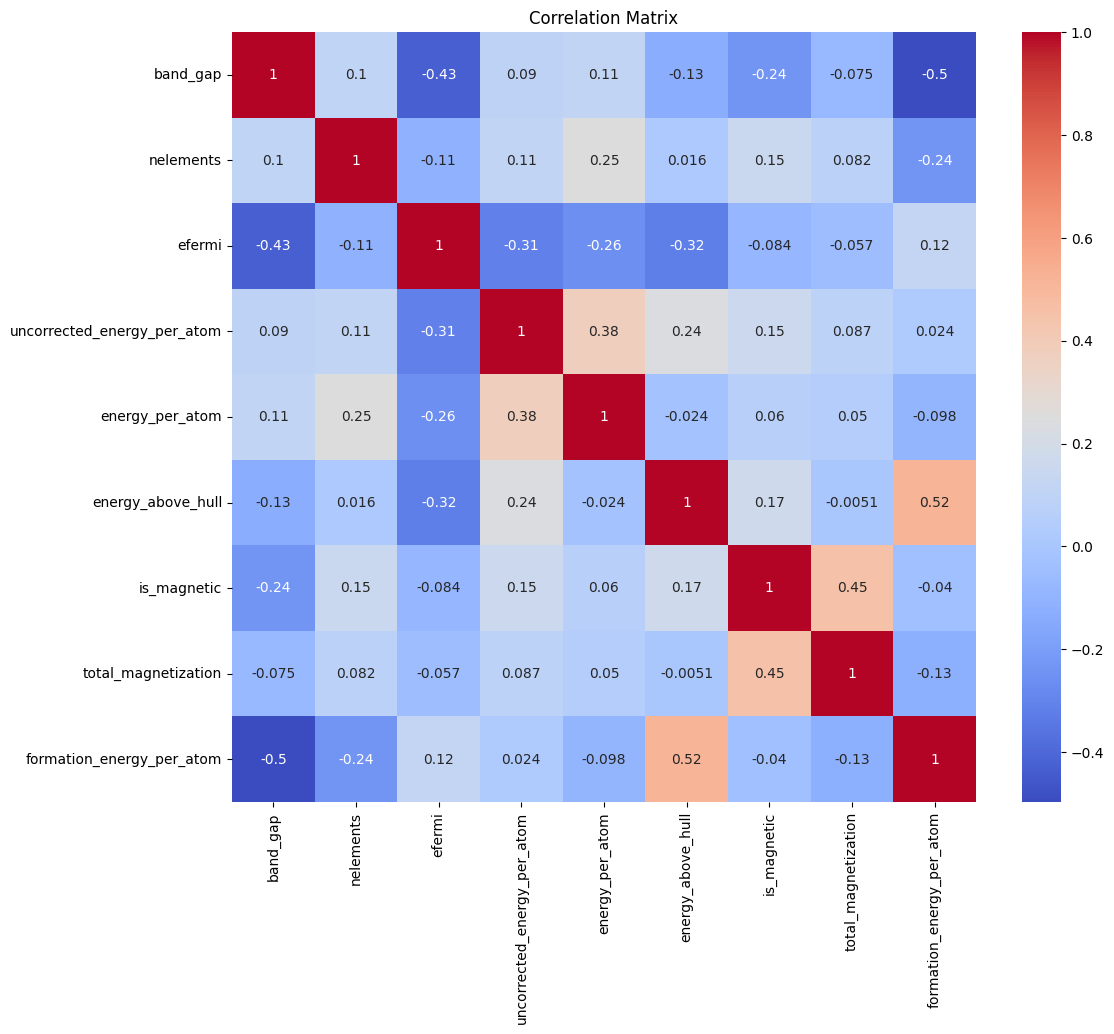

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### wyraźniejsza korelacja jest między energy above hull, a formation energy per atom, ale nie wiem czy użyję tej wiedzy do selekcji cech

### Zakres band gapu

In [14]:
print(df['band_gap'].min())
print(df['band_gap'].max())

0.0
17.8914


### Zakres jest szeroki, ale przewodniki maja niski, okolozerowy band gap, wiec to moze byc dobry pomysl zrobic klasyfikacje binarna - 0 - band gap przewodnika - 1 reszty

### Jak jest z band gapem w tlenkach - dwuelementowych

In [15]:
df.head()

,elements,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,ordering,total_magnetization
0,[Ac],1,Ac,mp-10018,-68.615840,-68.615840,0.021639,0.021639,0.0,6.200711,False,NM,0.000059
1,[Ac],1,Ac,mp-1183057,-4.105589,-68.621894,0.015586,0.015586,0.0,6.155243,False,NM,0.022801
2,[Ac],1,Ac,mp-1183069,-68.625658,-68.625658,0.011822,0.011822,0.0,6.286559,False,NM,0.000972
3,[Ac],1,Ac,mp-862690,-68.637479,-68.637479,0.000000,0.000000,0.0,6.128110,False,NM,0.000107
4,"[Ac, Ag, Ir]",3,Ac2AgIr,mp-861724,-53.160833,-53.160833,-0.413285,0.000000,0.0,6.546351,False,NM,0.000014


In [16]:
oxides = df[df['elements'].apply(lambda x: len(x) == 2 and "O" in x)]
oxides.head()

,elements,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,ordering,total_magnetization
34,"[Ac, O]",2,Ac2O3,mp-11107,-34.665751,-34.665751,-3.634369,0.000000,3.5226,4.696451,False,NM,0.000000
178,"[Ac, O]",2,AcO,mp-1183172,-7.116528,-40.138442,-2.839377,0.189264,0.0000,7.134518,False,NM,1.359942
301,"[Ag, O]",2,Ag2O,mp-353,-16.393354,-3.860246,-0.314200,0.000000,0.0000,0.826337,False,NM,0.000000
302,"[Ag, O]",2,Ag2O,mp-38238,-3.522557,-3.751557,-0.205511,0.108689,0.0000,0.722750,False,NM,0.000002
303,"[Ag, O]",2,Ag2O,mp-754338,-16.374151,-3.841043,-0.294997,0.019203,0.0000,1.244201,False,NM,0.000000


#### Band gap w tlenkach

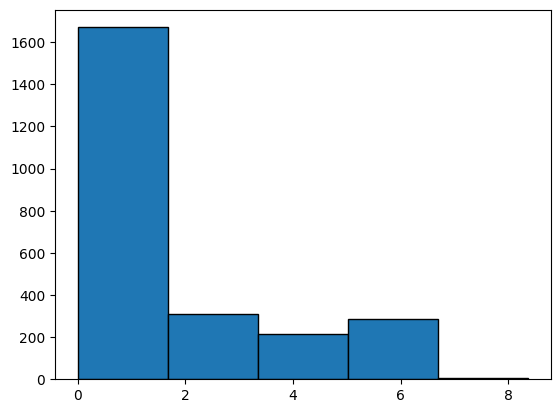

In [17]:
import matplotlib.pyplot as plt
plt.hist(oxides['band_gap'], bins=5, edgecolor='black')

plt.show()

### Band gap ogólnie

(array([8.1175e+04, 4.8070e+03, 1.1900e+02, 1.0000e+00, 4.0000e+00]),
 array([ 0.     ,  3.57828,  7.15656, 10.73484, 14.31312, 17.8914 ]),
 <BarContainer object of 5 artists>)

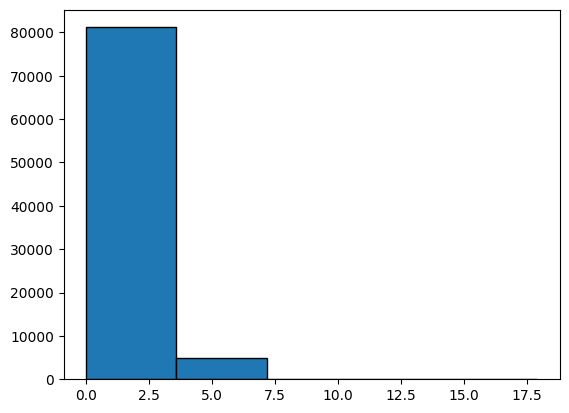

In [19]:
plt.hist(df['band_gap'], bins=5, edgecolor='black')

## band gap > od 0 i rowny 0 w pierwiastkach z top 15 tlenkow

/tmp/ipykernel_33/381218871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['other_element'] = filtered_df['elements'].apply(lambda x: x[0] if x[1] == "O" else x[1])


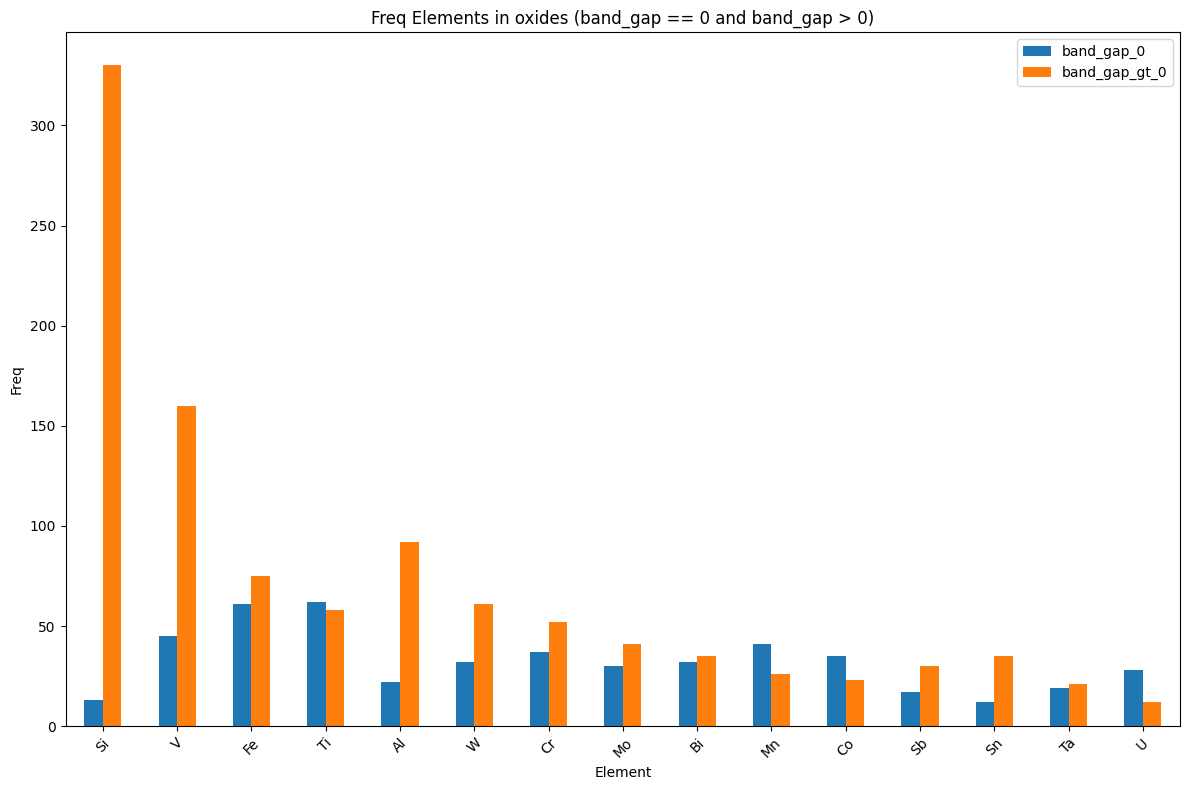

In [20]:
filtered_df = df[df['elements'].apply(lambda x: len(x) == 2 and "O" in x)]

filtered_df['other_element'] = filtered_df['elements'].apply(lambda x: x[0] if x[1] == "O" else x[1])

count_0 = filtered_df[filtered_df['band_gap'] == 0]['other_element'].value_counts()
count_gt_0 = filtered_df[filtered_df['band_gap'] > 0]['other_element'].value_counts()

count_df = pd.DataFrame({'band_gap_0': count_0, 'band_gap_gt_0': count_gt_0}).fillna(0)

count_df['total'] = count_df['band_gap_0'] + count_df['band_gap_gt_0']
top_15_count_df = count_df.nlargest(15, 'total')

top_15_count_df[['band_gap_0','band_gap_gt_0']].plot(kind='bar', figsize=(12, 8))
plt.xlabel('Element')
plt.ylabel('Freq')
plt.title('Freq Elements in oxides (band_gap == 0 and band_gap > 0)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

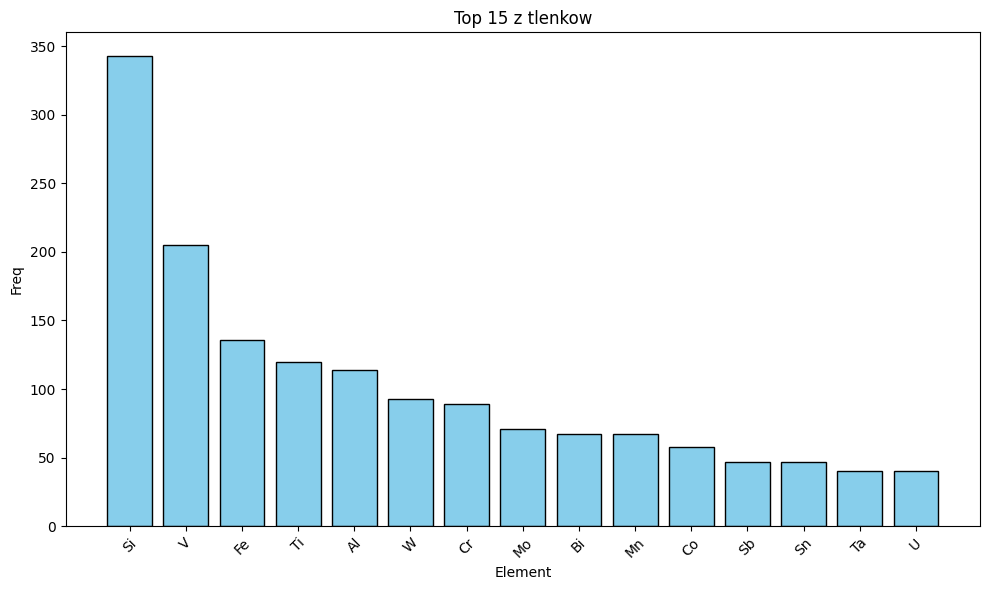

In [21]:
from collections import Counter
oxide_pair = [element for sublist in filtered_df['elements'] for element in sublist if element != "O"]

element_counts = Counter(oxide_pair)

top_15 = element_counts.most_common(15)

elements, counts = zip(*top_15)

plt.figure(figsize=(10, 6))
plt.bar(elements, counts, color='skyblue', edgecolor='black')
plt.xlabel('Element')
plt.ylabel('Freq')
plt.title('Top 15 z tlenkow')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Wygląda na to, ze w TOP15 z reguly tlenki nie są przewodnikami / band gap jest > 0

#### Zapis kopii df, do regresji, bo sprobuje skategorywzowac band gap

In [22]:
df_regression = df.copy()
df_regression

,elements,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,ordering,total_magnetization
0,[Ac],1,Ac,mp-10018,-68.615840,-68.615840,0.021639,0.021639,0.0,6.200711,False,NM,0.000059
1,[Ac],1,Ac,mp-1183057,-4.105589,-68.621894,0.015586,0.015586,0.0,6.155243,False,NM,0.022801
2,[Ac],1,Ac,mp-1183069,-68.625658,-68.625658,0.011822,0.011822,0.0,6.286559,False,NM,0.000972
3,[Ac],1,Ac,mp-862690,-68.637479,-68.637479,0.000000,0.000000,0.0,6.128110,False,NM,0.000107
4,"[Ac, Ag, Ir]",3,Ac2AgIr,mp-861724,-53.160833,-53.160833,-0.413285,0.000000,0.0,6.546351,False,NM,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86608,"[Co, Si, Zr]",3,ZrCoSi,mp-1102565,-15.744957,-7.861548,-0.826070,0.000000,0.0,6.495916,True,FM,3.248911
86609,"[Co, Si, Zr]",3,ZrCoSi,mp-1215304,-7.631870,-7.608203,-0.572725,0.253345,0.0,7.250945,False,NM,0.006680
86610,"[Co, Sn, Zr]",3,ZrCoSn,mp-30563,-20.679260,-7.030170,-0.466607,0.000000,0.0,7.481996,True,FiM,1.065065
86611,"[Cr, Zr]",2,ZrCr2,mp-1919,-17.443717,-17.443717,0.188442,0.188442,0.0,5.482434,False,NM,0.000034


### POD KLASYFIKCAJE ZAMIENIE BandGap 0 - 0, >0 - 1, zeby miec 2 kategorie
### NIE UZYWAC TEGO POD INNE MODELE z regresja, TE GDZIE NIE MA KLASYFIKACJI BINARNEJ

In [23]:
import numpy as np
df["band_gap"] =  np.where(df['band_gap'] == 0, 0, 1)

df_cat = df.copy()

df_cat["band_gap"] =  np.where(df_cat['band_gap'] == 0, 0, 1)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 86106 entries, 0 to 86612
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   elements                     86106 non-null  object 
 1   nelements                    86106 non-null  int64  
 2   formula_pretty               86106 non-null  object 
 3   material_id                  86106 non-null  object 
 4   uncorrected_energy_per_atom  86106 non-null  float64
 5   energy_per_atom              86106 non-null  float64
 6   formation_energy_per_atom    86106 non-null  float64
 7   energy_above_hull            86106 non-null  float64
 8   band_gap                     86106 non-null  int64  
 9   efermi                       86106 non-null  float64
 10  is_magnetic                  86106 non-null  bool   
 11  ordering                     86106 non-null  object 
 12  total_magnetization          86106 non-null  float64
dtypes: bool(1), float64(6

In [24]:
df

,elements,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,ordering,total_magnetization
0,[Ac],1,Ac,mp-10018,-68.615840,-68.615840,0.021639,0.021639,0,6.200711,False,NM,0.000059
1,[Ac],1,Ac,mp-1183057,-4.105589,-68.621894,0.015586,0.015586,0,6.155243,False,NM,0.022801
2,[Ac],1,Ac,mp-1183069,-68.625658,-68.625658,0.011822,0.011822,0,6.286559,False,NM,0.000972
3,[Ac],1,Ac,mp-862690,-68.637479,-68.637479,0.000000,0.000000,0,6.128110,False,NM,0.000107
4,"[Ac, Ag, Ir]",3,Ac2AgIr,mp-861724,-53.160833,-53.160833,-0.413285,0.000000,0,6.546351,False,NM,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86608,"[Co, Si, Zr]",3,ZrCoSi,mp-1102565,-15.744957,-7.861548,-0.826070,0.000000,0,6.495916,True,FM,3.248911
86609,"[Co, Si, Zr]",3,ZrCoSi,mp-1215304,-7.631870,-7.608203,-0.572725,0.253345,0,7.250945,False,NM,0.006680
86610,"[Co, Sn, Zr]",3,ZrCoSn,mp-30563,-20.679260,-7.030170,-0.466607,0.000000,0,7.481996,True,FiM,1.065065
86611,"[Cr, Zr]",2,ZrCr2,mp-1919,-17.443717,-17.443717,0.188442,0.188442,0,5.482434,False,NM,0.000034


### jest jeszcze problem zapisu pierwiastkow (elements), zeby machine learning to przyjal

In [25]:
empty_arrays = df['elements'].apply(lambda x: len(x) == 0)

empty_arrays.any()


False

In [26]:
all_elements = [element for sublist in df['elements'] for element in sublist]
unique_elements = set(all_elements)

len(unique_elements)

88

In [27]:
unique_elements

{'Ac',
 'Ag',
 'Al',
 'Ar',
 'As',
 'Au',
 'B',
 'Ba',
 'Be',
 'Bi',
 'Br',
 'C',
 'Ca',
 'Cd',
 'Ce',
 'Cl',
 'Co',
 'Cr',
 'Cs',
 'Cu',
 'Dy',
 'Er',
 'Eu',
 'F',
 'Fe',
 'Ga',
 'Gd',
 'Ge',
 'H',
 'He',
 'Hf',
 'Hg',
 'Ho',
 'I',
 'In',
 'Ir',
 'K',
 'Kr',
 'La',
 'Li',
 'Lu',
 'Mg',
 'Mn',
 'Mo',
 'N',
 'Na',
 'Nb',
 'Nd',
 'Ne',
 'Ni',
 'Np',
 'O',
 'Os',
 'P',
 'Pa',
 'Pb',
 'Pd',
 'Pm',
 'Pr',
 'Pt',
 'Pu',
 'Rb',
 'Re',
 'Rh',
 'Ru',
 'S',
 'Sb',
 'Sc',
 'Se',
 'Si',
 'Sm',
 'Sn',
 'Sr',
 'Ta',
 'Tb',
 'Tc',
 'Te',
 'Th',
 'Ti',
 'Tl',
 'Tm',
 'U',
 'V',
 'W',
 'Xe',
 'Y',
 'Zn',
 'Zr'}

### WYBRALEM BINARYZACJE KAZDEGO PIERWIASTKA ZAMIAST TABLICY Z PIERWIASTKAMI. ILOSC PIERWIASTKA W ZWIAZKU JEST POMINIETA

In [28]:
print(df['elements'].isna().sum())
print(df_cat['elements'].isna().sum())
print(df_regression['elements'].isna().sum())

0
0
0


#### byly problemy z binaryzacja bez resetu indexu, nanowalo wiele danych bez resetu, wiec uzywam resetu(ciekawostka)

In [29]:
from sklearn.preprocessing import MultiLabelBinarizer
df_cat.reset_index(drop=True, inplace=True)
mlb = MultiLabelBinarizer()
binarized_data = mlb.fit_transform(df_cat['elements'])
binarized_df = pd.DataFrame(binarized_data, columns=mlb.classes_)
df_cat_bin = pd.concat([df_cat, binarized_df], axis=1)
df_cat_bin.drop(columns=['elements'], inplace=True)

df_cat_bin.tail()

,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,...,Ti,Tl,Tm,U,V,W,Xe,Y,Zn,Zr
86101,3,ZrCoSi,mp-1102565,-15.744957,-7.861548,-0.826070,0.000000,0,6.495916,True,...,0,0,0,0,0,0,0,0,0,1
86102,3,ZrCoSi,mp-1215304,-7.631870,-7.608203,-0.572725,0.253345,0,7.250945,False,...,0,0,0,0,0,0,0,0,0,1
86103,3,ZrCoSn,mp-30563,-20.679260,-7.030170,-0.466607,0.000000,0,7.481996,True,...,0,0,0,0,0,0,0,0,0,1
86104,2,ZrCr2,mp-1919,-17.443717,-17.443717,0.188442,0.188442,0,5.482434,False,...,0,0,0,0,0,0,0,0,0,1
86105,2,ZrCr2,mp-570608,-9.312536,-17.627665,0.004494,0.004494,0,5.354204,False,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df_regression.reset_index(drop=True, inplace=True)
mlb = MultiLabelBinarizer()
binarized_data = mlb.fit_transform(df_regression['elements'])
binarized_df = pd.DataFrame(binarized_data, columns=mlb.classes_)
df_reg_bin = pd.concat([df_regression, binarized_df], axis=1)
df_reg_bin.drop(columns=['elements'], inplace=True)
df_reg_bin.tail()

,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,...,Ti,Tl,Tm,U,V,W,Xe,Y,Zn,Zr
86101,3,ZrCoSi,mp-1102565,-15.744957,-7.861548,-0.826070,0.000000,0.0,6.495916,True,...,0,0,0,0,0,0,0,0,0,1
86102,3,ZrCoSi,mp-1215304,-7.631870,-7.608203,-0.572725,0.253345,0.0,7.250945,False,...,0,0,0,0,0,0,0,0,0,1
86103,3,ZrCoSn,mp-30563,-20.679260,-7.030170,-0.466607,0.000000,0.0,7.481996,True,...,0,0,0,0,0,0,0,0,0,1
86104,2,ZrCr2,mp-1919,-17.443717,-17.443717,0.188442,0.188442,0.0,5.482434,False,...,0,0,0,0,0,0,0,0,0,1
86105,2,ZrCr2,mp-570608,-9.312536,-17.627665,0.004494,0.004494,0.0,5.354204,False,...,0,0,0,0,0,0,0,0,0,1


#### od teraz uzywam do klasyfikacji df_cat_bin, do regresji df_reg_bin

In [31]:
df_cat_bin
df_reg_bin

,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,...,Ti,Tl,Tm,U,V,W,Xe,Y,Zn,Zr
0,1,Ac,mp-10018,-68.615840,-68.615840,0.021639,0.021639,0.0,6.200711,False,...,0,0,0,0,0,0,0,0,0,0
1,1,Ac,mp-1183057,-4.105589,-68.621894,0.015586,0.015586,0.0,6.155243,False,...,0,0,0,0,0,0,0,0,0,0
2,1,Ac,mp-1183069,-68.625658,-68.625658,0.011822,0.011822,0.0,6.286559,False,...,0,0,0,0,0,0,0,0,0,0
3,1,Ac,mp-862690,-68.637479,-68.637479,0.000000,0.000000,0.0,6.128110,False,...,0,0,0,0,0,0,0,0,0,0
4,3,Ac2AgIr,mp-861724,-53.160833,-53.160833,-0.413285,0.000000,0.0,6.546351,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86101,3,ZrCoSi,mp-1102565,-15.744957,-7.861548,-0.826070,0.000000,0.0,6.495916,True,...,0,0,0,0,0,0,0,0,0,1
86102,3,ZrCoSi,mp-1215304,-7.631870,-7.608203,-0.572725,0.253345,0.0,7.250945,False,...,0,0,0,0,0,0,0,0,0,1
86103,3,ZrCoSn,mp-30563,-20.679260,-7.030170,-0.466607,0.000000,0.0,7.481996,True,...,0,0,0,0,0,0,0,0,0,1
86104,2,ZrCr2,mp-1919,-17.443717,-17.443717,0.188442,0.188442,0.0,5.482434,False,...,0,0,0,0,0,0,0,0,0,1


In [32]:
df

,elements,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,ordering,total_magnetization
0,[Ac],1,Ac,mp-10018,-68.615840,-68.615840,0.021639,0.021639,0,6.200711,False,NM,0.000059
1,[Ac],1,Ac,mp-1183057,-4.105589,-68.621894,0.015586,0.015586,0,6.155243,False,NM,0.022801
2,[Ac],1,Ac,mp-1183069,-68.625658,-68.625658,0.011822,0.011822,0,6.286559,False,NM,0.000972
3,[Ac],1,Ac,mp-862690,-68.637479,-68.637479,0.000000,0.000000,0,6.128110,False,NM,0.000107
4,"[Ac, Ag, Ir]",3,Ac2AgIr,mp-861724,-53.160833,-53.160833,-0.413285,0.000000,0,6.546351,False,NM,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86608,"[Co, Si, Zr]",3,ZrCoSi,mp-1102565,-15.744957,-7.861548,-0.826070,0.000000,0,6.495916,True,FM,3.248911
86609,"[Co, Si, Zr]",3,ZrCoSi,mp-1215304,-7.631870,-7.608203,-0.572725,0.253345,0,7.250945,False,NM,0.006680
86610,"[Co, Sn, Zr]",3,ZrCoSn,mp-30563,-20.679260,-7.030170,-0.466607,0.000000,0,7.481996,True,FiM,1.065065
86611,"[Cr, Zr]",2,ZrCr2,mp-1919,-17.443717,-17.443717,0.188442,0.188442,0,5.482434,False,NM,0.000034


### id wydaje sie nieprzydatne, formula pretty moglaby sie przydac, moze moznaby mnozyc binarizera przez ilosc, ale tym razem tego nie zrobie

In [33]:
df_cat_bin
df_reg_bin

,nelements,formula_pretty,material_id,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,...,Ti,Tl,Tm,U,V,W,Xe,Y,Zn,Zr
0,1,Ac,mp-10018,-68.615840,-68.615840,0.021639,0.021639,0.0,6.200711,False,...,0,0,0,0,0,0,0,0,0,0
1,1,Ac,mp-1183057,-4.105589,-68.621894,0.015586,0.015586,0.0,6.155243,False,...,0,0,0,0,0,0,0,0,0,0
2,1,Ac,mp-1183069,-68.625658,-68.625658,0.011822,0.011822,0.0,6.286559,False,...,0,0,0,0,0,0,0,0,0,0
3,1,Ac,mp-862690,-68.637479,-68.637479,0.000000,0.000000,0.0,6.128110,False,...,0,0,0,0,0,0,0,0,0,0
4,3,Ac2AgIr,mp-861724,-53.160833,-53.160833,-0.413285,0.000000,0.0,6.546351,False,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86101,3,ZrCoSi,mp-1102565,-15.744957,-7.861548,-0.826070,0.000000,0.0,6.495916,True,...,0,0,0,0,0,0,0,0,0,1
86102,3,ZrCoSi,mp-1215304,-7.631870,-7.608203,-0.572725,0.253345,0.0,7.250945,False,...,0,0,0,0,0,0,0,0,0,1
86103,3,ZrCoSn,mp-30563,-20.679260,-7.030170,-0.466607,0.000000,0.0,7.481996,True,...,0,0,0,0,0,0,0,0,0,1
86104,2,ZrCr2,mp-1919,-17.443717,-17.443717,0.188442,0.188442,0.0,5.482434,False,...,0,0,0,0,0,0,0,0,0,1


df

In [34]:
df_cat_bin.drop(columns =['material_id'], inplace=True)
df_reg_bin.drop(columns =['material_id'], inplace=True)

df_cat_bin.drop(columns = ['formula_pretty'],  inplace=True)
df_reg_bin.drop(columns = ['formula_pretty'],  inplace=True)



# # df_final = df_final.drop(columns =['material_id'], inplace=True)
# # df_final = df_final.drop(columns = ['formula_pretty']) ## moznaby zreobic jakis sprytny zapis ze ma np 2 Ac, 1 Ag etc
# # df_regression_final =df_regression_final.drop(columns =['material_id'])
# # df_regression_final = df_regression_final.drop(columns = ['formula_pretty'])

In [35]:
df_cat_bin['ordering'].unique()

array(['NM', 'FM', 'FiM', 'Unknown', 'AFM'], dtype=object)

#### to wartoby zmienic na wartosci numeryczne

In [36]:
value_mapping = {
    'NM': 1,
    'FM': 2,
    'FiM': 3,
    'Unknown': 4,
    'AFM': 5,
    np.nan: 6 
}

df_cat_bin['ordering']= df_cat_bin['ordering'].map(value_mapping)

df_reg_bin['ordering']= df_reg_bin['ordering'].map(value_mapping)


# df_final['ordering'] = df_final['ordering'].map(value_mapping)
# df_regression_final['ordering'] = df_regression_final['ordering'].map(value_mapping)



In [37]:
df_cat_bin.tail()

,nelements,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,ordering,total_magnetization,...,Ti,Tl,Tm,U,V,W,Xe,Y,Zn,Zr
86101,3,-15.744957,-7.861548,-0.826070,0.000000,0,6.495916,True,2,3.248911,...,0,0,0,0,0,0,0,0,0,1
86102,3,-7.631870,-7.608203,-0.572725,0.253345,0,7.250945,False,1,0.006680,...,0,0,0,0,0,0,0,0,0,1
86103,3,-20.679260,-7.030170,-0.466607,0.000000,0,7.481996,True,3,1.065065,...,0,0,0,0,0,0,0,0,0,1
86104,2,-17.443717,-17.443717,0.188442,0.188442,0,5.482434,False,1,0.000034,...,0,0,0,0,0,0,0,0,0,1
86105,2,-9.312536,-17.627665,0.004494,0.004494,0,5.354204,False,1,0.000009,...,0,0,0,0,0,0,0,0,0,1


In [38]:
df_cat_bin['ordering'].unique()

array([1, 2, 3, 4, 5])

In [39]:
# df_final = df_final.dropna()
# df_regression_final = df_regression_final.dropna() 


In [40]:
# df_final

In [41]:
df_cat_bin
df_reg_bin

,nelements,uncorrected_energy_per_atom,energy_per_atom,formation_energy_per_atom,energy_above_hull,band_gap,efermi,is_magnetic,ordering,total_magnetization,...,Ti,Tl,Tm,U,V,W,Xe,Y,Zn,Zr
0,1,-68.615840,-68.615840,0.021639,0.021639,0.0,6.200711,False,1,0.000059,...,0,0,0,0,0,0,0,0,0,0
1,1,-4.105589,-68.621894,0.015586,0.015586,0.0,6.155243,False,1,0.022801,...,0,0,0,0,0,0,0,0,0,0
2,1,-68.625658,-68.625658,0.011822,0.011822,0.0,6.286559,False,1,0.000972,...,0,0,0,0,0,0,0,0,0,0
3,1,-68.637479,-68.637479,0.000000,0.000000,0.0,6.128110,False,1,0.000107,...,0,0,0,0,0,0,0,0,0,0
4,3,-53.160833,-53.160833,-0.413285,0.000000,0.0,6.546351,False,1,0.000014,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86101,3,-15.744957,-7.861548,-0.826070,0.000000,0.0,6.495916,True,2,3.248911,...,0,0,0,0,0,0,0,0,0,1
86102,3,-7.631870,-7.608203,-0.572725,0.253345,0.0,7.250945,False,1,0.006680,...,0,0,0,0,0,0,0,0,0,1
86103,3,-20.679260,-7.030170,-0.466607,0.000000,0.0,7.481996,True,3,1.065065,...,0,0,0,0,0,0,0,0,0,1
86104,2,-17.443717,-17.443717,0.188442,0.188442,0.0,5.482434,False,1,0.000034,...,0,0,0,0,0,0,0,0,0,1


### Podzial klasyfikacja

In [42]:
df_cat_bin

from sklearn.model_selection import train_test_split
X = df_cat_bin.drop(columns = ['band_gap'])
y = df_cat_bin['band_gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###x

### Logit regression z tuningiem hiperparametrow

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear', 'saga']
}
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
pipeline.fit(X_train, y_train)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)




[CV] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   6.9s
[CV] END logisticregression__C=0.1, logisticregression__penalty=l1, logisticregression__solver=saga; total time=  20.1s
[CV] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear; total time=   3.0s
[CV] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=liblinear; total time=   3.0s
[CV] END logisticregression__C=0.1, logisticregression__penalty=l2, logisticregression__solver=saga; total time=  16.9s
[CV] END logisticregression__C=1, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   3.1s
[CV] END logisticregression__C=1, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   2.7s
[CV] END logisticregression__C=1, logisticregression__penalty=l1, logisticregression__solver=liblinear; total time=   3.5s
[CV] END logisti

In [51]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


In [56]:
best_params

{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

Accuracy: 0.8403785855301359
Confusion Matrix:
 [[9430 1286]
 [1463 5043]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     10716
           1       0.80      0.78      0.79      6506

    accuracy                           0.84     17222
   macro avg       0.83      0.83      0.83     17222
weighted avg       0.84      0.84      0.84     17222

AUC Score: 0.9182719841575014


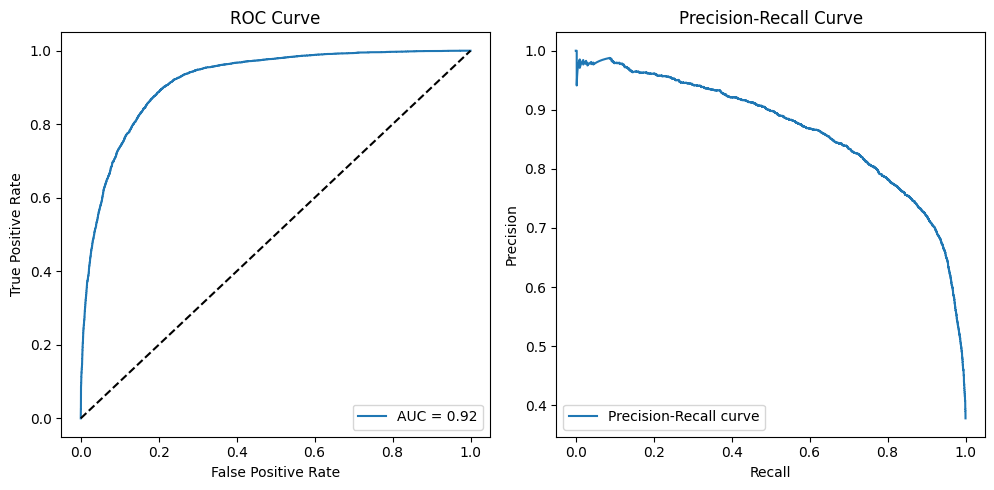

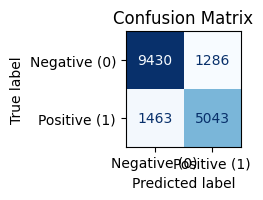

In [52]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("AUC Score:", auc_score)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

plt.subplot(1, 3, 3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])
plt.yticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])

plt.tight_layout()
plt.show()

### Logit regression - pierwsza jaka zrobilem zanim uzylem grid searcha, wyniki niemal identyczne, tuning sie nie przydal w tym przypadku a grid search dlugo trwal

In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=400, solver='saga'))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]



Accuracy: 0.8404366507954941
Confusion Matrix:
 [[9432 1284]
 [1464 5042]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     10716
           1       0.80      0.77      0.79      6506

    accuracy                           0.84     17222
   macro avg       0.83      0.83      0.83     17222
weighted avg       0.84      0.84      0.84     17222

AUC Score: 0.9182834158769457


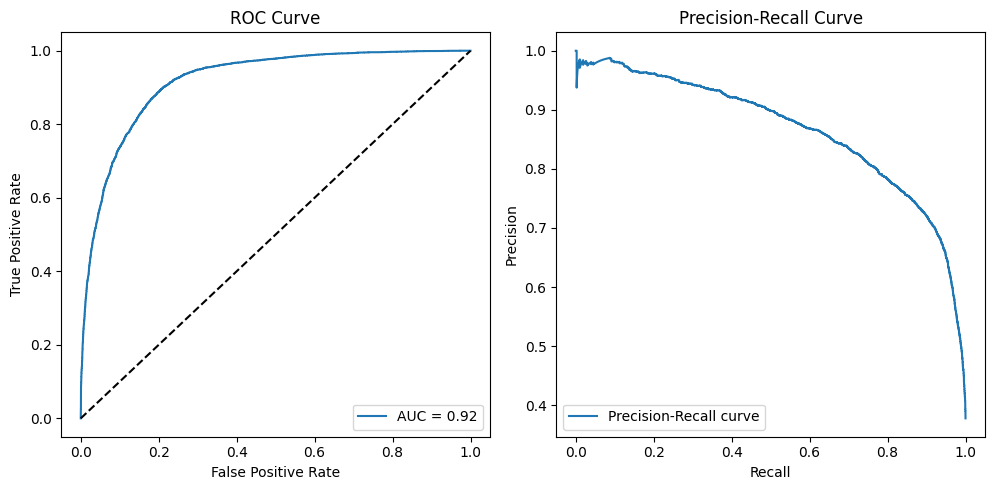

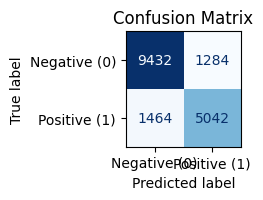

In [54]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("AUC Score:", auc_score)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

plt.subplot(1, 3, 3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])
plt.yticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])

plt.tight_layout()
plt.show()

### wyniki wydaja sie przyzwoite, ale zobacze jeszcze dla innych hiperparametrów


Accuracy: 0.8424108698176751
Confusion Matrix:
 [[9374 1253]
 [1461 5134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87     10627
           1       0.80      0.78      0.79      6595

    accuracy                           0.84     17222
   macro avg       0.83      0.83      0.83     17222
weighted avg       0.84      0.84      0.84     17222

AUC Score: 0.9197827383052295


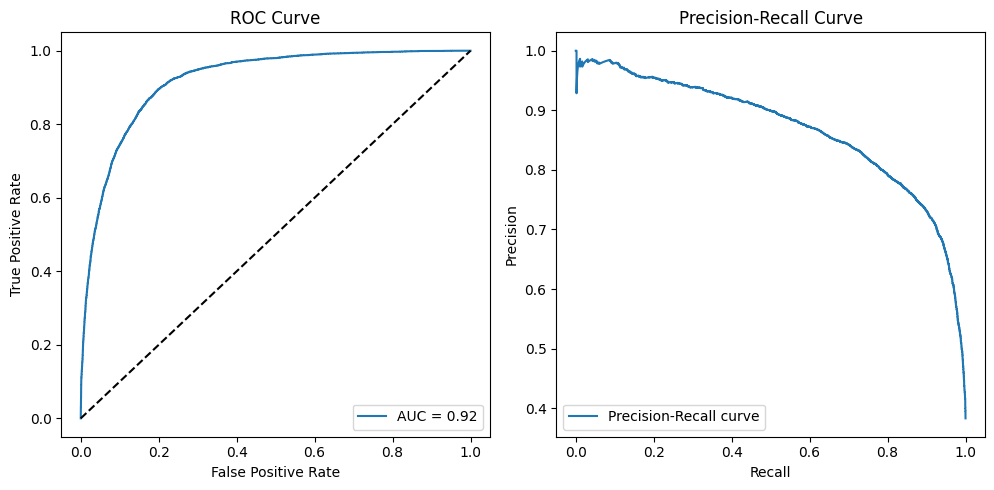

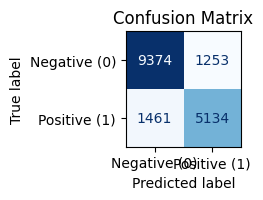

In [48]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=400, solver='saga', penalty='l2'))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("AUC Score:", auc_score)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

plt.subplot(1, 3, 3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])
plt.yticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])

plt.tight_layout()
plt.show()

###X

### Random forest


In [44]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

Accuracy: 0.8943212170479619
Confusion Matrix:
 [[9868  827]
 [ 993 5534]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92     10695
           1       0.87      0.85      0.86      6527

    accuracy                           0.89     17222
   macro avg       0.89      0.89      0.89     17222
weighted avg       0.89      0.89      0.89     17222

AUC Score: 0.9634014010060559


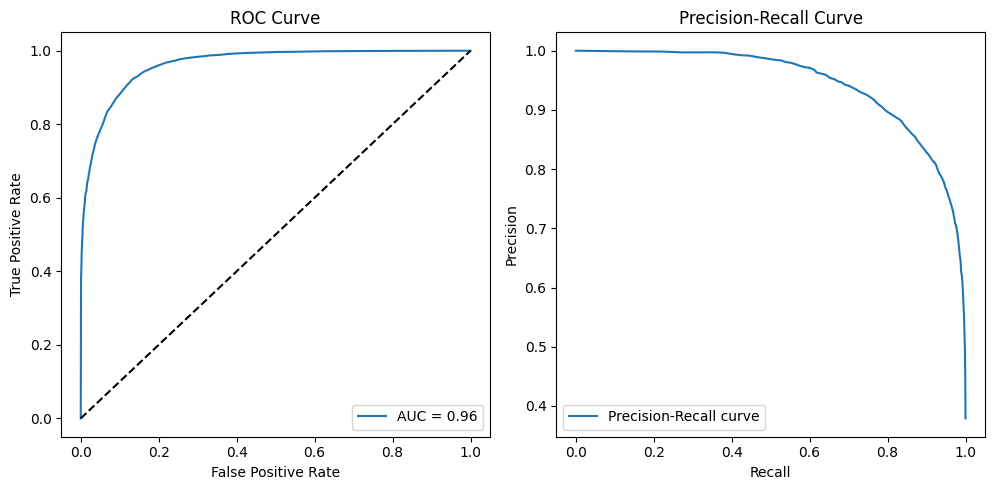

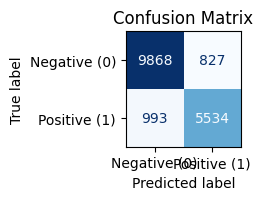

In [45]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("AUC Score:", auc_score)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

plt.subplot(1, 3, 3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])
plt.yticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])

plt.tight_layout()
plt.show()

### Random FOrest ma najlepszy wynik

### Kolejna klasyfikacja na Suport vector machine

In [46]:
from sklearn.model_selection import train_test_split
X = df_cat_bin.drop(columns = ['band_gap'])
y = df_cat_bin['band_gap']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# najlepszy byl rbf ale lepiej od SVM wyszedl logit reg
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0, probability=True,max_iter=100))
# pipeline = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0, probability=True,max_iter=100)) 
#dla linear niskie acc, sigmoid  i poly tez bez szalu
# pipeline = make_pipeline(StandardScaler(), SVC(kernel='poly', C=1.0, probability=True,max_iter=100)) 


pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]



/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### wyniki dla svm

Accuracy: 0.72459644640576
Confusion Matrix:
 [[8210 2485]
 [2258 4269]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.77      0.78     10695
           1       0.63      0.65      0.64      6527

    accuracy                           0.72     17222
   macro avg       0.71      0.71      0.71     17222
weighted avg       0.73      0.72      0.73     17222

AUC Score: 0.7858613979705116


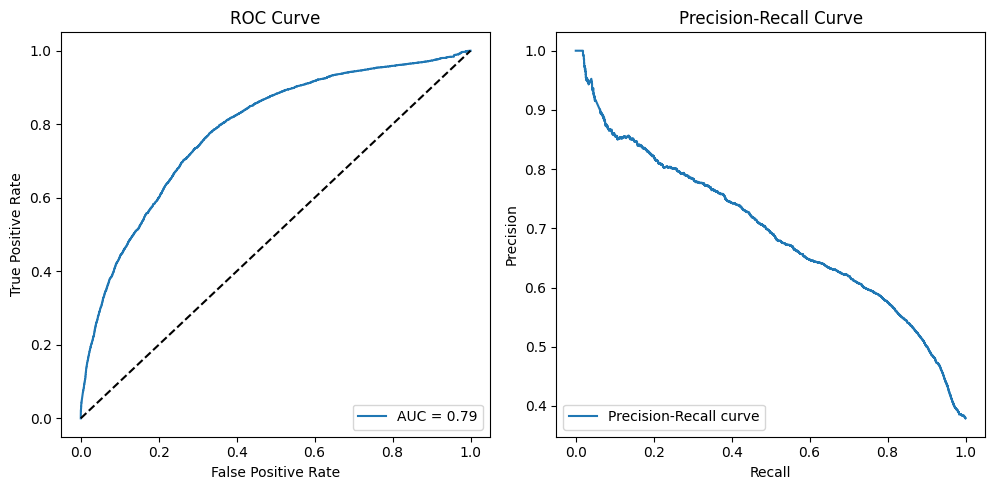

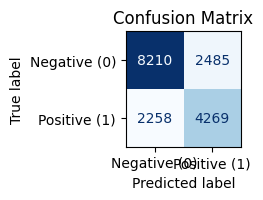

In [48]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("AUC Score:", auc_score)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

plt.subplot(1, 3, 2)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

plt.subplot(1, 3, 3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline.classes_)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])
plt.yticks(ticks=[0, 1], labels=['Negative (0)', 'Positive (1)'])

plt.tight_layout()
plt.show()

### SVM Gorzej poradzil sobie z klasyfikacja od RF i LR